<a href="https://colab.research.google.com/github/tommasoboccali/ml_infn_hackBase/blob/main/Simple_Rizzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a **classifier** using either a shallow Neural Network (such as MLP with a single hidden layer) or a Deep Network.
The classifier can take as input some user generated data, e.g. a partition of the [0,1]x[0,1] square (x1 > x2^2).

Complete the code below where indicated

Use Keras docs as needed https://keras.io/api/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.layers import Input, Dense #FILL HERE#<- which layers are needed as a bare minimum to build a NLP or a feed fwd deep net?
from keras.models import Model



Generate some data

In [ ]:
from math import *
# Fixing random state for reproducibility
np.random.seed(123)

#try changing this
theFunction = lambda x1,x2 : np.sin(x1*20) > x2  #FILL HERE# Try using a different function, keep in mind x1 and x2 are numpy arrays!

N=3000
x1 = 1.0 * np.random.rand(N)
x2 = 1.0 * np.random.rand(N)
y=theFunction(x1,x2) 


print(x1[:10])
print(x2[:10])
X=np.stack((x1,x2),axis=1) #FILL HERE# create a matrix with two columns one with data from x1, the other from x2

#FILL HERE# print the first 10 entries of X and y
print(X[:10,:])
print(y[:20])
print(X.shape)

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752]
[0.96942611 0.72178369 0.18189166 0.88202837 0.47702151 0.84685675
 0.83090753 0.01735057 0.23366189 0.91109161]
[[0.69646919 0.96942611]
 [0.28613933 0.72178369]
 [0.22685145 0.18189166]
 [0.55131477 0.88202837]
 [0.71946897 0.47702151]
 [0.42310646 0.84685675]
 [0.9807642  0.83090753]
 [0.68482974 0.01735057]
 [0.4809319  0.23366189]
 [0.39211752 0.91109161]]
[ True False False False  True False False  True False  True False  True
  True  True  True  True False False False False]
(3000, 2)


Now let's look  at the data we generated, does it look like you expect?


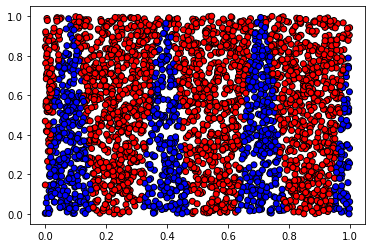

In [ ]:
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
        

Let's compare with a colormap made using directly the generating function (remember, in real case world we will not know such function)

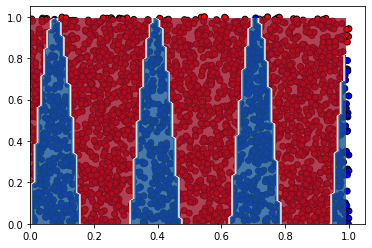

In [ ]:
xx1, xx2 = np.meshgrid(np.arange(0, 1, 0.01),np.arange(0, 1, 0.01))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.contourf(xx1, xx2, (theFunction(xx1,xx2)).reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)

In [ ]:

inputs=Input(shape=(2)) #FILL THE DOTS# what is the shape that our input data has?
hidden=Dense(700,activation="relu")(inputs) #FILL HERE# create a new Dense layer with 500 nodes taking "inputs" as input , what is the most appropriate activation?
outputs = Dense(1, activation='sigmoid')(hidden) #FILL THE DOTS# what is the most appropriate activation for the final node of a classifier?
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adam')

model.summary()
#FILL HERE# print the model structure, it should look like
#Layer (type)                 Output Shape              Param #   
#=================================================================
#input_1 (InputLayer)         [(None, 2)]               0         
#_________________________________________________________________
#dense (Dense)                (None, 500)               1500      
#_________________________________________________________________
#dense_1 (Dense)              (None, 1)                 501       
#=================================================================

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 700)               2100      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 701       
Total params: 2,801
Trainable params: 2,801
Non-trainable params: 0
_________________________________________________________________


Split the dataset in training+validation and test, then fit




In [ ]:
history=model.fit(X,y,validation_split=0.5,epochs=500,verbose=1) #FILL THE DOTS# What is the name of the keras function to train a model




Epoch 1/500
47/47 [==============================] - 3s 12ms/step - loss: 0.6423 - val_loss: 0.5965
Epoch 2/500
47/47 [==============================] - 0s 4ms/step - loss: 0.5947 - val_loss: 0.5912
Epoch 3/500
47/47 [==============================] - 0s 4ms/step - loss: 0.5932 - val_loss: 0.5842
Epoch 4/500
47/47 [==============================] - 0s 4ms/step - loss: 0.6042 - val_loss: 0.5817
Epoch 5/500
47/47 [==============================] - 0s 4ms/step - loss: 0.6021 - val_loss: 0.5800
Epoch 6/500
47/47 [==============================] - 0s 4ms/step - loss: 0.5824 - val_loss: 0.5788
Epoch 7/500
47/47 [==============================] - 0s 3ms/step - loss: 0.5772 - val_loss: 0.5774
Epoch 8/500
47/47 [==============================] - 0s 4ms/step - loss: 0.5815 - val_loss: 0.5755
Epoch 9/500
47/47 [==============================] - 0s 3ms/step - loss: 0.5770 - val_loss: 0.5808
Epoch 10/500
47/47 [==============================] - 0s 3ms/step - loss: 0.5819 - val_loss: 0.5734
Epoch 11

In the history object a history.history dictionary contains the validation and training loss vs epoch, let's try to plot them and compare to evaluate the training

dict_keys(['loss', 'val_loss'])
[0.6266077160835266, 0.6014639735221863, 0.5945082902908325, 0.5905389189720154, 0.5880261063575745, 0.5863128900527954, 0.5839590430259705, 0.5816786289215088, 0.580739438533783, 0.5799984931945801, 0.5785871744155884, 0.5795865654945374, 0.5743373036384583, 0.5723219513893127, 0.570314884185791, 0.5705653429031372, 0.5689930319786072, 0.568903386592865, 0.5655854344367981, 0.5651394724845886, 0.5653273463249207, 0.5650432705879211, 0.5625388026237488, 0.5603834390640259, 0.5601255893707275, 0.5581501126289368, 0.5591781735420227, 0.559943675994873, 0.5575249195098877, 0.5568875074386597, 0.5552841424942017, 0.5542495846748352, 0.5525631904602051, 0.5513633489608765, 0.5520516633987427, 0.5525117516517639, 0.5507028102874756, 0.5495659708976746, 0.5507145524024963, 0.5497534871101379, 0.548330545425415, 0.5470600724220276, 0.5467706322669983, 0.5474241375923157, 0.5483672618865967, 0.5466427206993103, 0.5442600846290588, 0.544450044631958, 0.54364365339

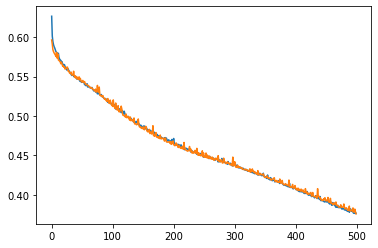

In [ ]:
print(history.history.keys())
print(history.history['loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
#FILL HERE#  use plt.plot(...) and plt.show() to make a plot with training vs validation
#...
#...



Now let's try to evaluate our model on the xx1,xx2 points we created earlier)

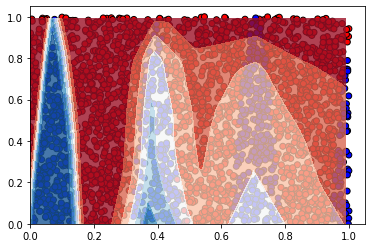

In [ ]:
 
testSet=np.stack((xx1.flatten(), xx2.flatten()), axis=-1)
pred=model.predict(testSet) #FILL THE DOTS# what is the keras function used to evaluate?
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.contourf(xx1, xx2, pred.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)

Now let's try to create a deep network instead with about the same number of parameters as the MLP above. Let's try with 4 hidden layers, how many nodes per layers are needed?

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_4 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 41        
Total params: 5,081
Trainable params: 5,081
Non-trainable params: 0
_________________________________________________________

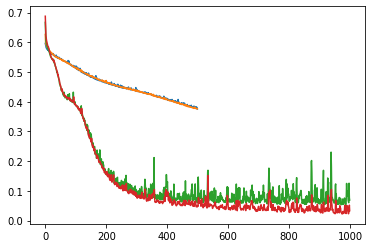

In [ ]:

inputs=Input(shape=(2,))
#FILL HERE# add 4 dense hidden layers
#...
#...
hidden = Dense(40, activation='relu')(inputs)
hidden = Dense(40, activation='relu')(hidden)
hidden = Dense(40, activation='relu')(hidden)
hidden = Dense(40, activation='relu')(hidden)
outputs = Dense(1, activation='sigmoid')(hidden)

deepmodel = Model(inputs=inputs, outputs=outputs)
deepmodel.compile(loss='binary_crossentropy', optimizer='adam')
deepmodel.summary()
deephistory=deepmodel.fit(X,y,validation_split=0.5,epochs=1000,batch_size=128,verbose=1) #CHANGE HERE# Trying increasing number of epochs and changing batch size

plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.plot(deephistory.history["val_loss"])
plt.plot(deephistory.history["loss"])
plt.show()

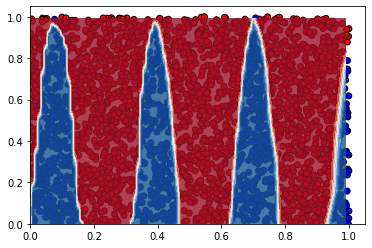

In [ ]:
 
testSet=np.stack((xx1.flatten(), xx2.flatten()), axis=-1)
pred=deepmodel.predict(testSet) #FILL THE DOTS# what is the keras function used to evaluate?
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors='k')
plt.contourf(xx1, xx2, pred.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)